In [1]:
from pyspark.sql import SparkSession
from operator import add
# spark://192.168.2.101:7077
# New API
spark_session = SparkSession\
        .builder\
        .master("spark://192.168.2.101:7077") \
        .appName("Group12-project_jesper")\
        .config("spark.executor.cores",4)\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled", True)\
        .config("spark.shuffle.service.enabled", False)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.driver.port",9998)\
        .config("spark.blockManager.port",10005)\
        .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/24 14:29:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/03/24 14:29:14 WARN ExecutorAllocationManager: Dynamic allocation without a shuffle service is an experimental feature.


In [2]:
# Old API (RDD)
spark_context = spark_session.sparkContext

spark_context.setLogLevel("ERROR")

In [3]:
data_frame = spark_session.read\
            .option("header", "true")\
            .json("hdfs://localhost:9000/user/ubuntu/project/RC_2006-03")\
            .cache()

In [4]:
data_frame.show(5)

+--------+----------------------+-----------------+--------------------+----------------+-----------+-------------+------+------+-----+-------+---------+------------+-----+--------+----------+------------+---+
|  author|author_flair_css_class|author_flair_text|                body|controversiality|created_utc|distinguished|edited|gilded|   id|link_id|parent_id|retrieved_on|score|stickied| subreddit|subreddit_id|ups|
+--------+----------------------+-----------------+--------------------+----------------+-----------+-------------+------+------+-----+-------+---------+------------+-----+--------+----------+------------+---+
|enjahova|                  null|             null|It's not garbage,...|               0| 1141171505|         null| false|     0|c2id4|t3_2cms| t1_c2g7c|  1473821737|    4|   false|reddit.com|        t5_6|  4|
|  arakyd|                  null|             null|Actually, it's ni...|               0| 1141171952|         null| false|     0|c2ie5|t3_2aru| t1_c2ic7|  14738

In [5]:
data_frame = data_frame.drop('author_flair_css_class', 'distinguished', 'author_flair_text', 'edited', 'gilded', 'link_id','parent_id', 'subreddit_id')
data_frame.show(5)

+--------+--------------------+----------------+-----------+-----+------------+-----+--------+----------+---+
|  author|                body|controversiality|created_utc|   id|retrieved_on|score|stickied| subreddit|ups|
+--------+--------------------+----------------+-----------+-----+------------+-----+--------+----------+---+
|enjahova|It's not garbage,...|               0| 1141171505|c2id4|  1473821737|    4|   false|reddit.com|  4|
|  arakyd|Actually, it's ni...|               0| 1141171952|c2ie5|  1473821737|    6|   false|reddit.com|  6|
|   olegk|I've read them, a...|               0| 1141171980|c2ie6|  1473821737|   -4|   false|reddit.com| -4|
|  duckie|If you look at a ...|               0| 1141172269|c2ier|  1473821738|    3|   false|reddit.com|  3|
|  arakyd|That's true, but ...|               0| 1141172372|c2if0|  1473821738|    2|   false|reddit.com|  2|
+--------+--------------------+----------------+-----------+-----+------------+-----+--------+----------+---+
only showi

In [6]:
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.pyplot as plt
import pyspark.sql.functions as f

In [7]:
data_frame.sort(col("score")).show(30)

+-----------+--------------------+----------------+-----------+-----+------------+-----+--------+----------+---+
|     author|                body|controversiality|created_utc|   id|retrieved_on|score|stickied| subreddit|ups|
+-----------+--------------------+----------------+-----------+-----+------------+-----+--------+----------+---+
|    the_po8|Utter right-wing ...|               0| 1141921654|c2vvo|  1473821990|  -95|   false|reddit.com|-95|
|        e40|Don't post links ...|               0| 1142451416|c34nk|  1473822151|  -52|   false|reddit.com|-52|
|  [deleted]|Don't mod down co...|               0| 1142451689|c34nv|  1473822151|  -46|   false|reddit.com|-46|
|     terry2|so what !?!.. and...|               0| 1142282442|c31am|  1473822090|  -36|   false|reddit.com|-36|
|  [deleted]|           [deleted]|               0| 1143081877|c3fga|  1473822350|  -36|   false|reddit.com|-36|
|  [deleted]|What is the "righ...|               0| 1143074237|c3fa1|  1473822346|  -31|   false

In [8]:
reddit_contro = data_frame.drop('id', 'created_utc', 'retrieved_on', 'stickied', 'ups')
reddit_contro.show(10)

+-----------+---------------------------------+----------------+-----+----------+
|     author|                             body|controversiality|score| subreddit|
+-----------+---------------------------------+----------------+-----+----------+
|   enjahova|             It's not garbage,...|               0|    4|reddit.com|
|     arakyd|             Actually, it's ni...|               0|    6|reddit.com|
|      olegk|             I've read them, a...|               0|   -4|reddit.com|
|     duckie|             If you look at a ...|               0|    3|reddit.com|
|     arakyd|             That's true, but ...|               0|    2|reddit.com|
|johnny_yuma|             High school drop ...|               0|    0|reddit.com|
|  [deleted]|                        [deleted]|               0|    2|reddit.com|
|   johnmudd|             They put the powe...|               0|    0|reddit.com|
|     iwadon|手元のiCalでも化けていたので、...|               0|    1|        ja|
|     kelyse|             or,

In [9]:
#reddit_contro.sort(col("controversiality").desc()).show(30)


reddit_contro.orderBy(col("controversiality").desc(), col("score").asc()).show(30)

+-----------+--------------------+----------------+-----+----------+
|     author|                body|controversiality|score| subreddit|
+-----------+--------------------+----------------+-----+----------+
|  [deleted]|You wonder why ma...|               1|  -21|reddit.com|
|  [deleted]|Don't mod somethi...|               1|  -15|reddit.com|
|    lowdown|Don't post origin...|               1|  -12|reddit.com|
|      kirkt|A hypocitical lib...|               1|  -11|reddit.com|
|EliGottlieb|Great, another pl...|               1|  -11|reddit.com|
|     maxhrk|wow. Church Quit ...|               1|  -10|reddit.com|
|      subie|thanks for the hi...|               1|   -9|reddit.com|
|      kirkt|junk science.  wh...|               1|   -7|reddit.com|
|  [deleted]|And what does tha...|               1|   -7|reddit.com|
|        chu|Completely incohe...|               1|   -7|reddit.com|
|  [deleted]|So much for Paul ...|               1|   -7|reddit.com|
|  [deleted]|Summary:\r\n&gt;R...|

In [10]:
#Are most of the controversial comments created by the same author?
controversial = reddit_contro.filter(reddit_contro.controversiality == 1)

# Controversial comments count
num_contro = controversial.count()
controversial_names = controversial.filter(reddit_contro.body != "[deleted]")
controversial_names.show(5)


+-----------+--------------------+----------------+-----+----------+
|     author|                body|controversiality|score| subreddit|
+-----------+--------------------+----------------+-----+----------+
|   Odysseus|Maybe kill the ad...|               1|   -2|reddit.com|
|tomwill2000|             how sad|               1|    4|reddit.com|
|   fnord123|&gt;"We'll take t...|               1|   -1|reddit.com|
|       spez|Yes, it was recen...|               1|    3|reddit.com|
|   paperhat|What is this Brit...|               1|    5|reddit.com|
+-----------+--------------------+----------------+-----+----------+
only showing top 5 rows



In [11]:
author = controversial_names.groupBy('author').count()
author.sort(col("count").desc()).show(20)

+-------------+-----+
|       author|count|
+-------------+-----+
|    [deleted]|  220|
| lupin_sansei|   27|
|      lowdown|   14|
|       TronXD|   12|
|  EliGottlieb|   11|
|     JimThome|   11|
|      Taladar|   10|
|        olegk|    9|
|     johnmudd|    8|
|    illiaster|    8|
|johnroman1970|    8|
|   paulgraham|    8|
|     akkartik|    7|
|          chu|    7|
|   yellowking|    7|
|   mikepurvis|    6|
|       hopper|    6|
|         bitz|    5|
|         spez|    5|
|         fnot|    5|
+-------------+-----+
only showing top 20 rows



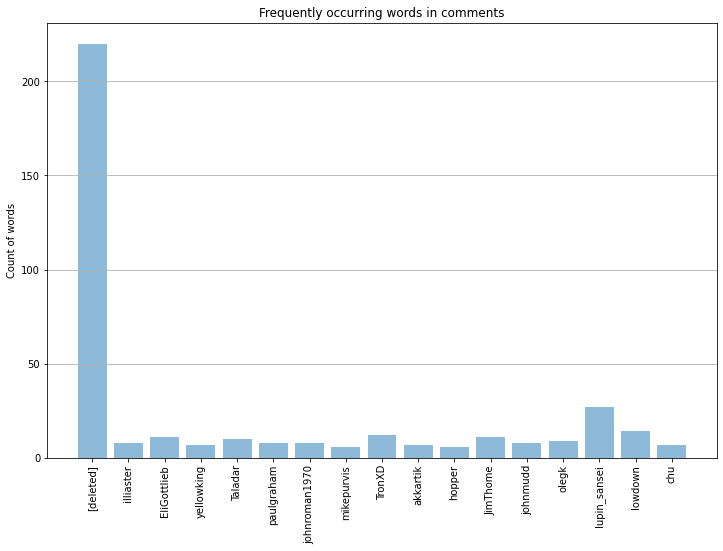

In [12]:
author = author.filter(col("count") > 5)
author = author.filter(author.author != "")

# Create arrays for the plot
author2 = author.select('author').rdd.flatMap(lambda x: x).collect()
x_pos = np.arange(len(author2))
occ = author.select('count').rdd.flatMap(lambda x: x).collect()

#build the plot
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x_pos, occ, align='center', alpha=0.5)
ax.set_ylabel('Count of words')
ax.set_xticks(x_pos)
ax.set_xticklabels(author2, rotation='vertical')
ax.set_title('Frequently occurring words in comments')
ax.yaxis.grid(True)
plt.show()

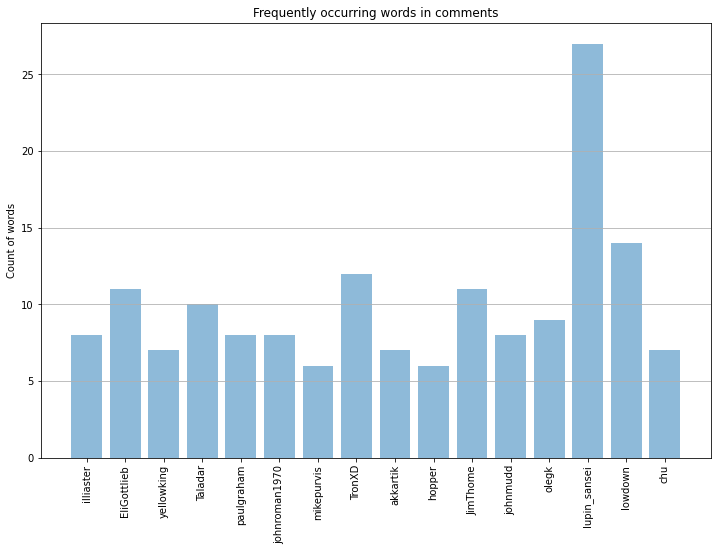

In [13]:
# Now if we remove "[deleted]".
author = author.filter(author.author != "[deleted]")

# Create arrays for the plot
author2 = author.select('author').rdd.flatMap(lambda x: x).collect()
x_pos = np.arange(len(author2))
occ = author.select('count').rdd.flatMap(lambda x: x).collect()

#build the plot
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x_pos, occ, align='center', alpha=0.5)
ax.set_ylabel('Count of words')
ax.set_xticks(x_pos)
ax.set_xticklabels(author2, rotation='vertical')
ax.set_title('Frequently occurring words in comments')
ax.yaxis.grid(True)
plt.show()

In [14]:
print(f'Out of {data_frame.count()} comments, {num_contro} were classified as controversial')
#print(data_frame.count())

Out of 13859 comments, 970 were classified as controversial


In [15]:
#Do controversial comments gain the same amount of score as “regular” comments?
noncontroversial = reddit_contro.filter(reddit_contro.controversiality == 0)

# Number of controversial comments
num_contro = controversial.count()
# Number of non controversial comments
num_noncontro = noncontroversial.count()




# Avrage score for contro comments and non contro comments
# Num cont score/num cont comments
score_non = noncontroversial.agg({'score': 'sum'}).collect()[0][0] 
avg_non = score_non/num_noncontro


# Num non cont score/num non cont comments
score_cont = controversial.agg({'score': 'sum'}).collect()[0][0]

avg_cont = score_cont/num_contro

print(f'The total score for the controverisal comments were {score_cont}')
print(f'The total score for the non controverisal comments were {score_non}')
print(f'The avrage score for controersial comments is: {avg_cont}')
print(f'The avrage score for non controersial comments is: {avg_non}')


The total score for the controverisal comments were 155
The total score for the non controverisal comments were 32423
The avrage score for controersial comments is: 0.15979381443298968
The avrage score for non controersial comments is: 2.515555900380169


Text(0.5, 1.0, 'Number of reddit comments')

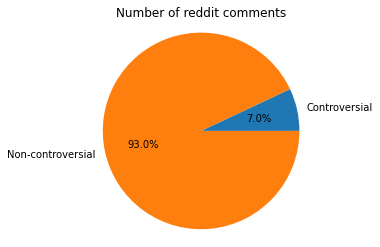

In [16]:
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Controversial', 'Non-controversial']
sizes = [num_contro, num_noncontro]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Number of reddit comments')

In [17]:
print('If we now remove all datapoints were the score was 0 we get:')

noncontroversial_2 = noncontroversial.filter(noncontroversial.score != 0)
controversial_2 = controversial.filter(controversial.score != 0)

# Number of controversial comments
num_contro2 = controversial_2.count()
# Number of non controversial comments
num_noncontro2 = noncontroversial_2.count()




# Avrage score for contro comments and non contro comments
# Num cont score/num cont comments
score_non2 = noncontroversial_2.agg({'score': 'sum'}).collect()[0][0] 
avg_non2 = score_non2/num_noncontro2


# Num non cont score/num non cont comments
score_cont2 = controversial_2.agg({'score': 'sum'}).collect()[0][0]

avg_cont2 = score_cont2/num_contro2

print(f'The total score for the controverisal comments were {score_cont2} (same as before)')
print(f'The total score for the non controverisal comments were {score_non2} (same as before)')
print(f'The avrage score for controersial comments is: {avg_cont2}')
print(f'The avrage score for non controersial comments is: {avg_non2}')




If we now remove all datapoints were the score was 0 we get:
The total score for the controverisal comments were 155 (same as before)
The total score for the non controverisal comments were 32423 (same as before)
The avrage score for controersial comments is: 0.2074966532797858
The avrage score for non controersial comments is: 2.7811803053697033


In [18]:
#What subreddits (according to this data) is considered to be “controversial”?
subreddits = controversial_names.groupBy('subreddit').count()
subreddits.sort(col("count").desc()).show(20)

+-----------+-----+
|  subreddit|count|
+-----------+-----+
| reddit.com|  772|
|programming|   49|
|         ru|    1|
+-----------+-----+



In [19]:
#What keywords are often used in controversial comments?

words = controversial.drop('author', 'controversiality', 'score', 'subreddit')
words.show(5)

+--------------------+
|                body|
+--------------------+
|           [deleted]|
|Maybe kill the ad...|
|             how sad|
|&gt;"We'll take t...|
|Yes, it was recen...|
+--------------------+
only showing top 5 rows



In [20]:

words = words.withColumn('wordCount', f.size(f.split(f.col('body'), ' ')))
words.show()

+--------------------+---------+
|                body|wordCount|
+--------------------+---------+
|           [deleted]|        1|
|Maybe kill the ad...|        7|
|             how sad|        2|
|&gt;"We'll take t...|       22|
|Yes, it was recen...|       27|
|What is this Brit...|       21|
|thank you... \r\n...|      100|
|One day, these pe...|       28|
|Nice use of Infog...|        4|
|Perhaps so, but t...|       38|
|Heh. FastSeductio...|       60|
|I still think it ...|        8|
|what a dupe. http...|        4|
|It's sad how many...|       34|
|&gt; His code was...|       16|
|"The poll, conduc...|       25|
|KNOWLEDGE = POWER...|       52|
|         good comedy|        2|
|I definitely will...|       33|
|Speech, religion,...|       25|
+--------------------+---------+
only showing top 20 rows



In [21]:
words = words.withColumn('word', f.explode(f.split(f.col('body'), ' ')))\
    .groupBy('word')\
    .count()\
    .sort('count', ascending=False)
words.show(5)

+----+-----+
|word|count|
+----+-----+
| the| 1403|
|  to| 1047|
|    |  863|
|  of|  808|
|   a|  802|
+----+-----+
only showing top 5 rows



In [22]:
words2 = words.filter(col("count") > 70)
words2 = words2.filter(words2.word != "")
words2.show()

+----+-----+
|word|count|
+----+-----+
| the| 1403|
|  to| 1047|
|  of|  808|
|   a|  802|
|  is|  600|
| and|  595|
|that|  594|
|   I|  504|
|  in|  473|
| you|  364|
|  it|  339|
| for|  325|
| are|  293|
|  be|  280|
| not|  227|
|have|  225|
|with|  216|
|this|  209|
|  on|  194|
|they|  190|
+----+-----+
only showing top 20 rows



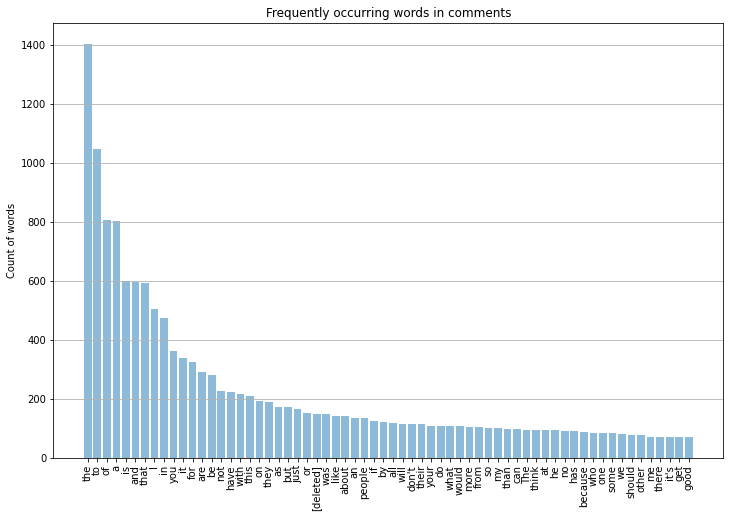

In [23]:
# Create arrays for the plot
words3 = words2.select('word').rdd.flatMap(lambda x: x).collect()
x_pos = np.arange(len(words3))
counts = words2.select('count').rdd.flatMap(lambda x: x).collect()

#build the plot
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x_pos, counts, align='center', alpha=0.5)
ax.set_ylabel('Count of words')
ax.set_xticks(x_pos)
ax.set_xticklabels(words3, rotation='vertical')
ax.set_title('Frequently occurring words in comments')
ax.yaxis.grid(True)


# Save the figure and show
#plt.tight_layout()
#plt.savefig('words_bar_plot.png')
plt.show()

In [24]:
# release the cores for another application!
spark_context.stop()